<a href="https://colab.research.google.com/github/IhlasulMufti/Machine-Learning/blob/main/Pertemuan_4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **LOGISTIC REGRESSION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/UNHAS/Datasets/calonpembeli_ch5.csv')
df1.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [ ]:
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


In [ ]:
df1 = df1[df1['Usia']<=100]
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,501.073146,43.323647,1.469940,0.480962,0.953908,270.430862,0.634269
std,288.823862,11.774139,1.073338,0.499888,0.801127,95.026802,0.481876
min,1.000000,24.000000,0.000000,0.000000,0.000000,95.000000,0.000000
25%,252.250000,33.000000,1.000000,0.000000,0.000000,187.250000,0.000000
50%,501.500000,43.000000,1.000000,0.000000,1.000000,259.000000,1.000000
75%,750.750000,53.000000,2.000000,1.000000,2.000000,352.750000,1.000000
max,1000.000000,65.000000,3.000000,1.000000,4.000000,490.000000,1.000000


In [ ]:
df1.isnull().sum()

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

In [ ]:
df1.dropna()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [ ]:
df1['Beli_Mobil'].value_counts()

1    633
0    365
Name: Beli_Mobil, dtype: int64

In [ ]:
import sklearn.model_selection as ms
X=df1[['Usia','Status','Kelamin','Memiliki_Mobil','Penghasilan']]
y=df1.Beli_Mobil
X_train,X_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
import sklearn.linear_model as lm
model = lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(model.coef_)

[[-0.0159435  -0.17093131 -1.03941699  0.07720535  0.05686692]]


In [ ]:
y_prediksi=model.predict(X_test)
print(y_prediksi)

[1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1]


In [ ]:
y_test

272    1
727    0
31     0
344    1
606    1
      ..
937    1
624    0
257    1
274    0
486    1
Name: Beli_Mobil, Length: 200, dtype: int64

In [ ]:
X_test


,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
272,54,3,0,0,416
727,45,2,1,1,131
31,37,2,1,1,203
344,58,0,0,1,265
606,53,1,0,1,348
...,...,...,...,...,...
937,44,3,0,1,330
624,48,0,0,2,145
257,28,1,1,1,391
274,26,2,0,1,177


In [ ]:
import sklearn.metrics as met
confusionmatrix = met.confusion_matrix(y_test,y_prediksi)
confusionmatrix

array([[ 59,   4],
       [  5, 132]])

acuracy=(TP+TN)/(TP+TM+FP+FN)

In [ ]:
score=model.score(X_test, y_test)
score

0.955

precision=(TP)/(TP+FP)

In [ ]:
precision=met.precision_score(y_test,y_prediksi)
precision

0.9705882352941176

recall(sensitivity)=TP/(TP+FN)

In [ ]:
recall=met.recall_score(y_test,y_prediksi)
recall

0.9635036496350365

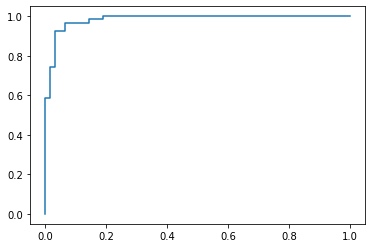

In [ ]:
import matplotlib.pyplot as plt
y_pred_prob=model.predict_proba(X_test)[::,1]
fp,tp, _ =met.roc_curve(y_test,y_pred_prob)
plt.plot(fp,tp)
plt.show()

In [ ]:
auc=met.roc_auc_score(y_test,y_prediksi)
auc

0.9500057930714866

Feature Selection RFE

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lm.LogisticRegression(), n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)
print('Support = ',rfe.support_)
print('Ranking = ',rfe.ranking_)

Support =  [False  True  True False  True]
Ranking =  [3 1 1 2 1]


Penjelasan: Yg bernilai true, adalah feature no 2,3 dan 5 yaitu Status, Jenis Kelamin, dan Penghasilan. Artinya ketiga feature tersebut cukup berpengaruh dalam membuat model dengan akurasi yang tinggi, sehingga apabila dua feature lain diabaikan maka model tetap memberikan prediksi yg cukup baik.